<a href="https://colab.research.google.com/github/Atmaja2001/Data_Science/blob/main/Note_book/ML_Model/Linear_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
df=pd.read_csv("/content/height-weight (1).csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

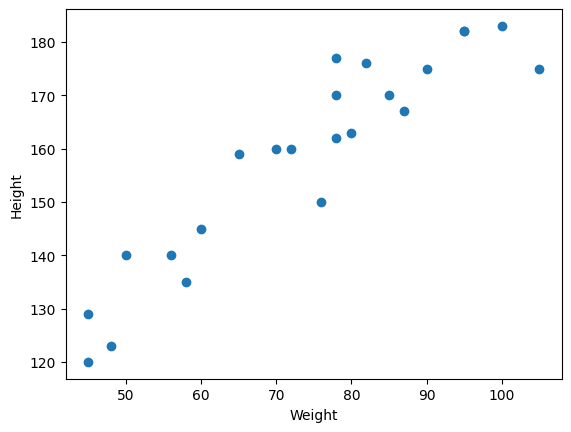

In [113]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [114]:
## Divide the dataset into independent and dependent dataset
X=df[['Weight']]    #Independent Feature
y=df['Height']    #Dependent Feature

In [115]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [116]:
#Train-test-split dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [117]:
X.shape

(23, 1)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [119]:
## Standardised the dataset, Train independent data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [120]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

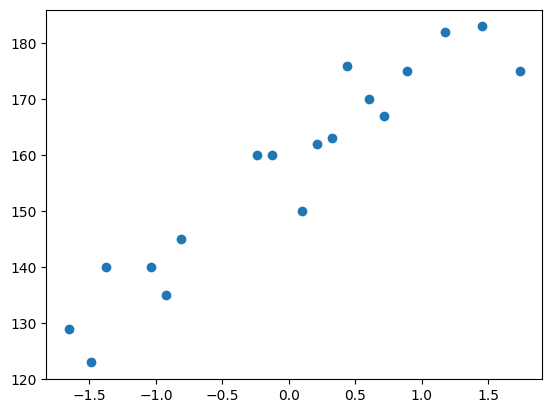

In [121]:
plt.scatter(X_train,y_train)

In [122]:
# Train the Simple Linear Regression model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [123]:
linear.fit(X_train,y_train)

LinearRegression()

In [124]:
print("The cofficient or slope of Weight is",linear.coef_)
print("The intercept ",linear.intercept_)

The cofficient or slope of Weight is [17.03440872]
The intercept  157.5


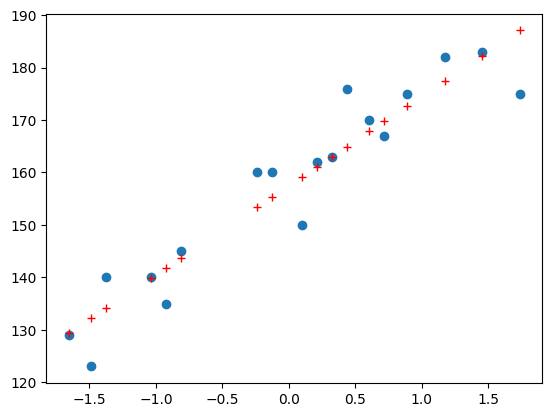

In [125]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear.predict(X_train),"r+")

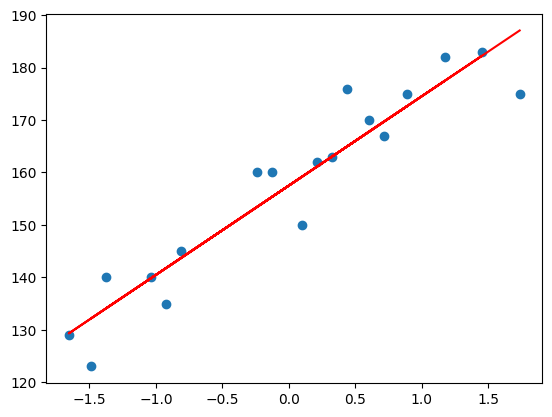

In [126]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear.predict(X_train),"r")

**Prediction of Train data**
  1. Predicted height output= intercept + coef_(Weight)
  2. y_pred_train= 157.5 + 17.034(X_train)

**Prediction of Train data**
  1. Predicted height output= intercept + coef_(Weight)
  2. y_pred_test= 157.5 + 17.034(X_test)

In [127]:
y_pred_test = linear.predict(X_test)

In [128]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

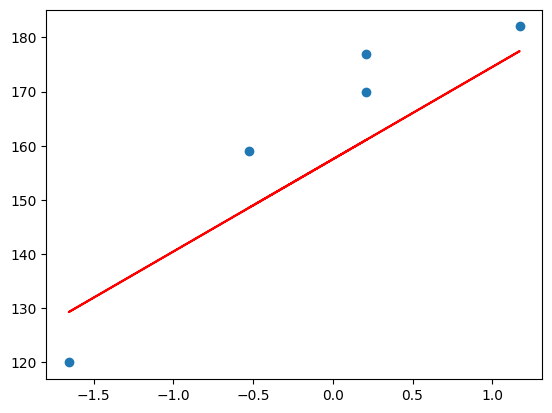

In [129]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linear.predict(X_test),"r")

# **Performance metrics**
   **MSE, MAE, RMSE**

  **R Sqaure, Adjust R square**

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [131]:
mse= mean_squared_error(y_test,y_pred_test)
mae= mean_absolute_error(y_test,y_pred_test)
rmse= np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


# **R Square Formula:**

  **R^2 = 1- SSR/SST**

  R^2 = coefficient of determination
  SSR = Sum of sqaure of residential
  SST = total sum of squares

In [132]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred_test)
print(r2)

0.776986986042344


In [133]:
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [147]:
import numpy as np

# New test features (weights)
X1 = np.array([[52],
                   [65],
                   [72],
                   [90],
                   [85],
                   [100],
                   [60],
                   [95],
                   [88],
                   [76]])

# New test targets (heights)
y1 = np.array([130, 148, 158, 172, 168, 180, 140, 177, 169, 160])


In [148]:
scaled_weight=sc.transform(X1)
scaled_weight

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.2594815 ],
       [-0.52452222],
       [-0.12877492],
       [ 0.88886101],
       [ 0.60618436],
       [ 1.4542143 ],
       [-0.80719886],
       [ 1.17153765],
       [ 0.77579035],
       [ 0.0973664 ]])

In [149]:
print("The height prediction for weight 80 kg is:",linear.predict(scaled_weight))

The height prediction for weight 80 kg is: [136.04547741 148.56507414 155.30639545 172.64122168 167.82599217
 182.27168069 143.74984463 177.45645118 170.71512987 159.15857905]


Text(0, 0.5, 'Height')

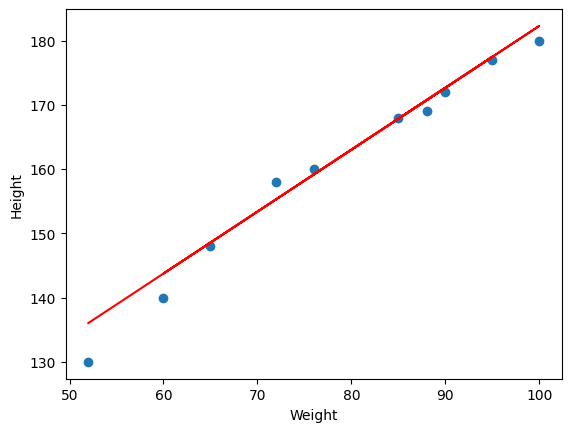

In [152]:
plt.scatter(X1,y1)
plt.plot(X1,linear.predict(scaled_weight),"r")
plt.xlabel('Weight')
plt.ylabel('Height')

In [153]:
## Residuals
y_pred=linear.predict(scaled_weight)
residuals=y1-y_pred
residuals

array([-6.04547741, -0.56507414,  2.69360455, -0.64122168,  0.17400783,
       -2.27168069, -3.74984463, -0.45645118, -1.71512987,  0.84142095])

/tmp/ipython-input-154-3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

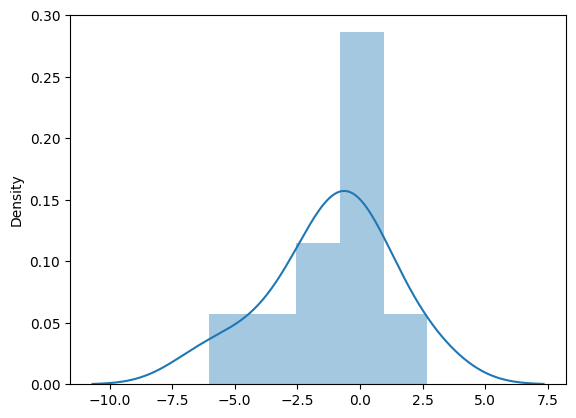

In [154]:
import seaborn as sns
sns.distplot(residuals,kde=True)

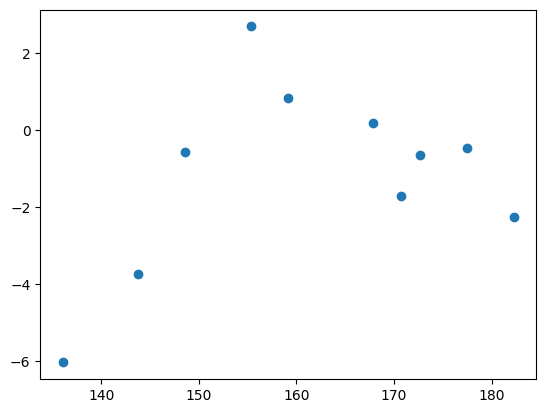

In [156]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)